In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Домашнее задание 1

#### 1.1 Скачайте данные 

In [7]:
df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


#### 1.2 Изучите распределение стоимости недвижимости

- Стоимость недвижимости - вещественный признак, для анализа его распределения наиболее подходит гистограмма
- Перед постороением графика необходимо подготовить данные 
- Для построения графика используем библиотеку matplotlib

In [8]:
df['price']=df['price'].astype(int)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
df['price'].describe().astype(int)

count      21613
mean      540088
std       367127
min        75000
25%       321950
50%       450000
75%       645000
max      7700000
Name: price, dtype: int32

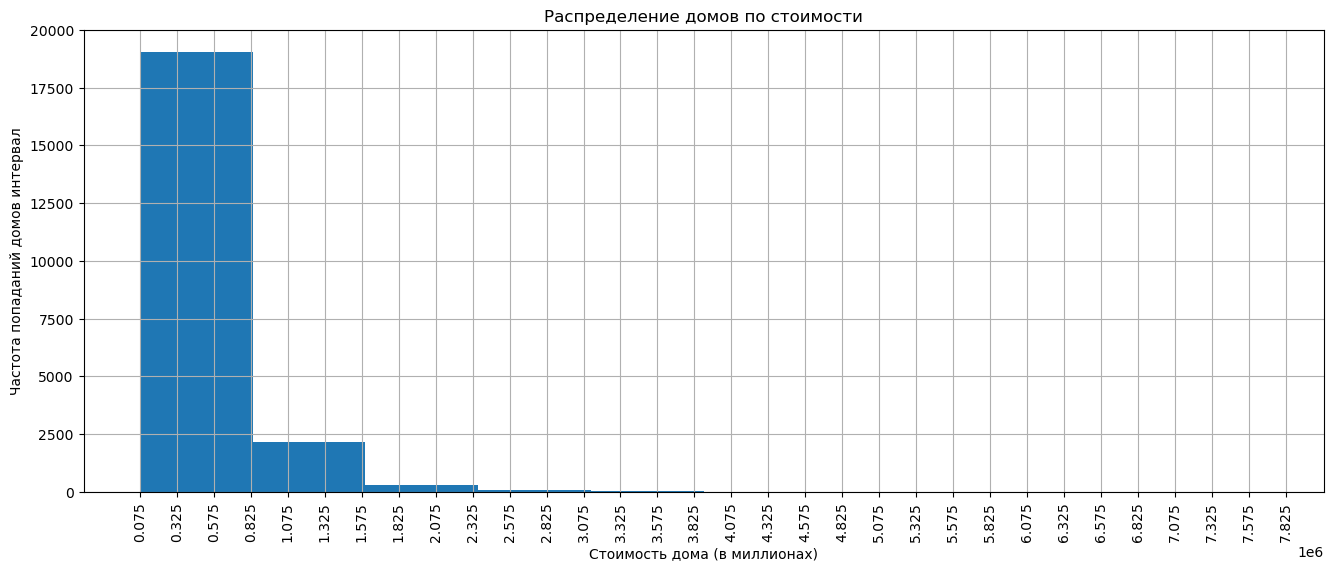

In [10]:
plt.figure(figsize=(16, 6))

plt.hist(df['price'])
plt.title('Распределение домов по стоимости')
plt.xlabel('Стоимость дома (в миллионах)')
plt.ylabel('Частота попаданий домов интервал')
plt.xticks(range(75000, 8000000, 250000), rotation=90)
plt.yticks(range(0, 22000, 2500))
plt.grid(); 

#### Вывод:
- из всей совокупности домов (21613 ед.) основная группа домов (до 19000 ед.) имеет стоимость от 0,075 - 0,825 млн., 
- выявлена небольшая группа (до 2200 ед.) со стоимостью в интервале 0,825 - 1,6 млн.

#### 1.3 Изучите распределение квадратуры жилой площади

In [11]:
df['sqft_living'].describe()

count    21613.000000
mean      2079.899736
std        918.440897
min        290.000000
25%       1427.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

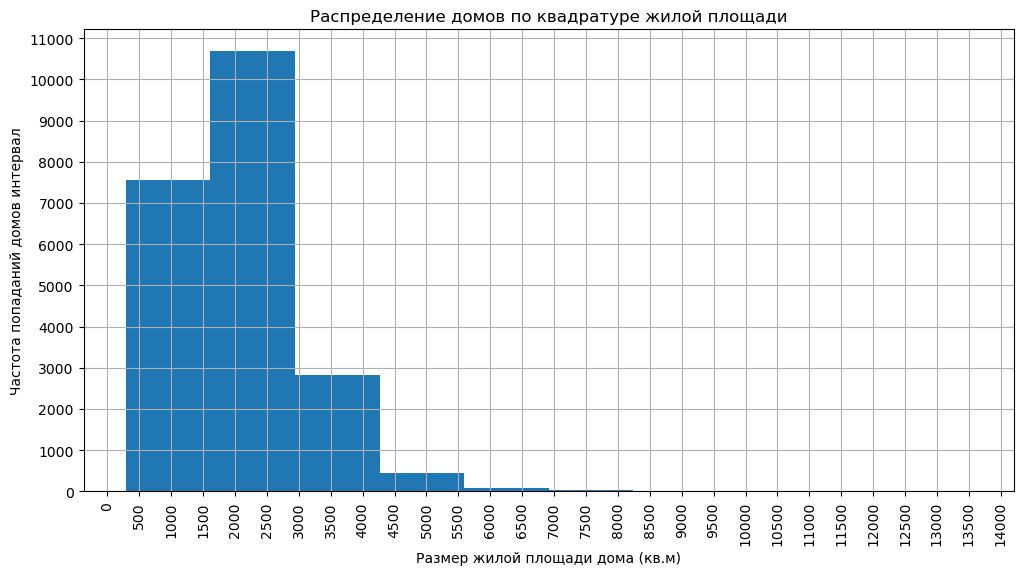

In [12]:
plt.figure(figsize=(12, 6))

plt.hist(df['sqft_living'])
plt.title('Распределение домов по квадратуре жилой площади')
plt.xlabel('Размер жилой площади дома (кв.м)')
plt.ylabel('Частота попаданий домов интервал')
plt.xticks(range(0, 14001, 500), rotation=90)
plt.yticks(range(0, 11500, 1000))
plt.grid(); 

#### Вывод:
- наибольшее количество домов занимают жилую площадь в интервале 1600 - 3000 кв.м
- вторая по частоте группа домов с минимальной жилой площадью до 1600 кв.мс
- третья по распределению группа домов с жилой площадью 3000 - 4250 кв.м

#### 1.4 Изучите распределение года постройки

In [13]:
df['yr_built'].describe().astype(int)

count    21613
mean      1971
std         29
min       1900
25%       1951
50%       1975
75%       1997
max       2015
Name: yr_built, dtype: int32

In [14]:
df['yr_built'].value_counts().sort_values()

1934     21
1935     24
1902     27
1901     29
1933     30
       ... 
2003    422
2004    433
2005    450
2006    454
2014    559
Name: yr_built, Length: 116, dtype: int64

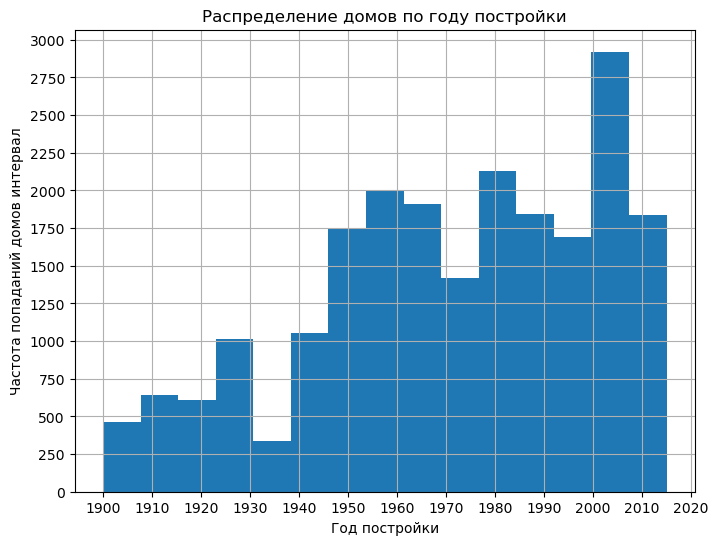

In [15]:
plt.figure(figsize=(8,6))

plt.hist(df['yr_built'], bins=15)
plt.title('Распределение домов по году постройки')
plt.xlabel('Год постройки')
plt.ylabel('Частота попаданий домов интервал')
plt.xticks(range(1900, 2021, 10))
plt.yticks(range(0, 3001, 250))
plt.grid(); 

#### Вывод:
- максимальный по застройке период с 2000 по 2008 гг.
- в 30-х годах прошлого века строительство домов было минимальным, с 1946 г. по 2000 г. застройка территории увеличилась  (видимо это связано с окончанием Великой дипресси и Второй мировой войны)

### Домашнее задание 2

#### 2.1 Изучите распределение домов от наличия вида на набережную

In [16]:
data_01 = df['waterfront'].value_counts()
data_01.index = ['нет вида', 'есть вид']
data_01.head()

нет вида    21450
есть вид      163
Name: waterfront, dtype: int64

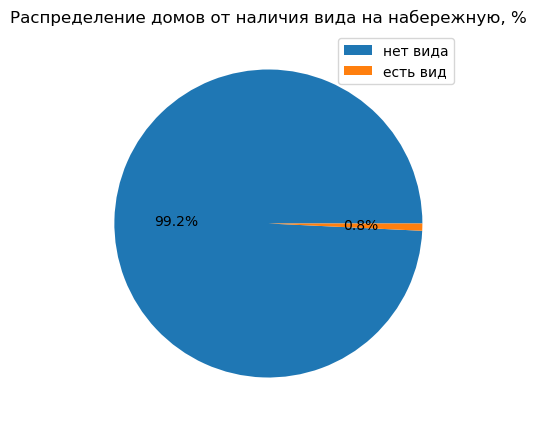

In [17]:
plt.figure(figsize=(6,5))

plt.title('Распределение домов от наличия вида на набережную, %')  
plt.pie(data_01, autopct='%1.1f%%')     
plt.legend(data_01.index); 

### Вывод:
Совокупность домов представленая преимущественно без видов на набережную. У 163 домов (0,8%) вид на набережную есть.

#### 2.2 Изучите распределение этажей домов

In [18]:
data_02 = df['floors'].value_counts()
data_02

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

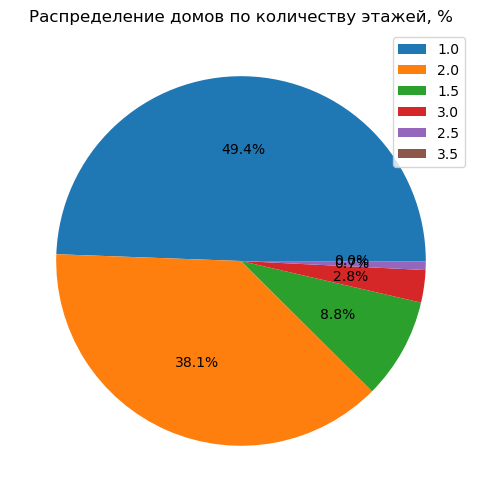

In [19]:
plt.figure(figsize=(8, 6))

plt.pie(data_02, autopct='%1.1f%%')

plt.title('Распределение домов по количеству этажей, %')
plt.legend(data_02.index); 

#### Вывод:
Жилой фонд представлен преимущественно одноэтажными (49,4%) и двухэтажными домами (38,1%). Доля домов выше 2,5 этажей незначительна.

#### 2.3 Изучите распределение состояния домов

In [20]:
data_03 = df['condition'].value_counts()
data_03

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

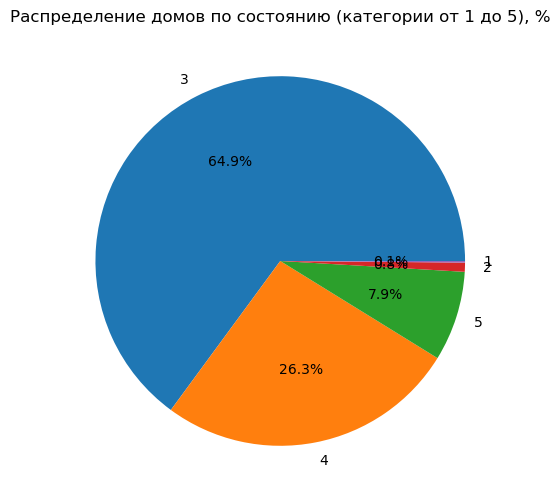

In [23]:
plt.figure(figsize=(8, 6))

plt.pie(data_03, autopct='%1.1f%%', labels=data_03.index)

plt.title('Распределение домов по состоянию (категории от 1 до 5), %'); 

#### Вывод:
Состояние жилового фонда "удовлетворительное" - 64,9% домов имеют оценку состояния "3". Доля домов с хорошим состоянием - 26,3%; с отличным состоянием - 7,9%.

### Домашнее задание 3

- Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
- Анализ сделайте в формате storytelling: дополните каждый график письменными выводами и наблюдениями.

- Чтобы узнать какие характеристики недвижимости влияют на стоимость недвижимости, необходимо рассчитать корреляционную матрицу.
- Для анализа используем библиотеку seaborn

In [26]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix = np.round(corr_matrix, 1)    
corr_matrix[np.abs(corr_matrix) < 0.3] = 0 
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0
waterfront,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0


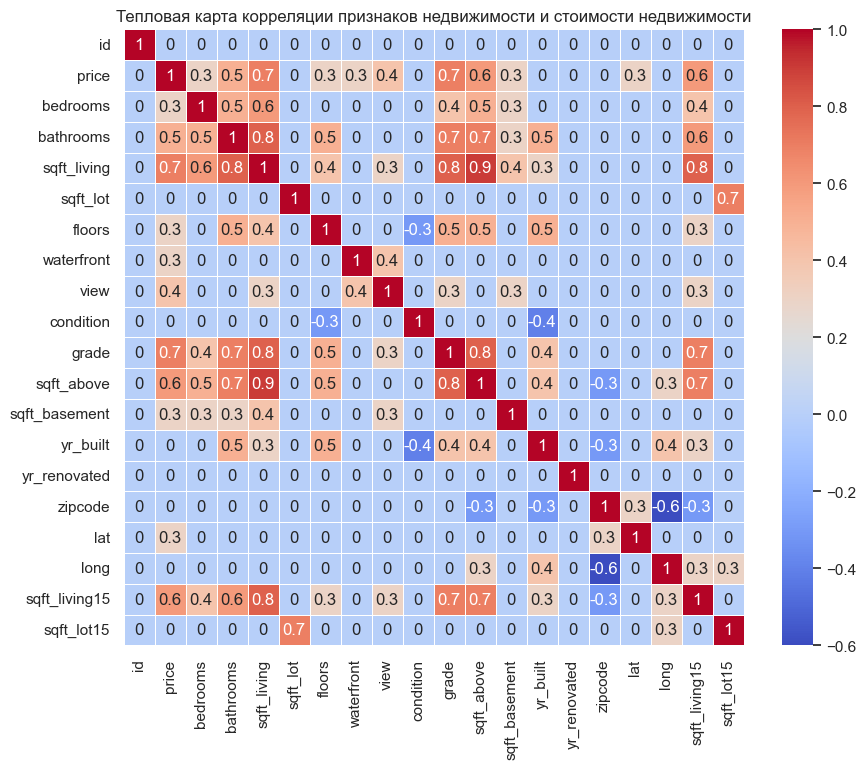

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm');
plt.title('Тепловая карта корреляции признаков недвижимости и стоимости недвижимости');

Шкала Чеддока (для коэф. Пирсона): 0.1 - 0.3 - Слабая 0.3 - 0.5 - Умеренная 0.5 - 0.7 - Заметная 0.7 - 0.9 - Высокая 0.9 - 0.99 - Весьма высокая

Воспользовавшись шкалой Чеддока определим признаки, оказывающие наибольшее влияние на стоимость домов: строка таблицы 2 'price':
- sqft_living (кв. метры жилые) - 0,7 высокая связь
- grade (качество конструкции и дизайна) - 0,7 высокая связь
- sqft_above - (кв. метры дома, которые находятся выше земли) - 0,6 заметная связь
- sqft_living15 - (кв. метры жилой площади у 15 соседей) - 0,6 заметная связь
- bathrooms - (кол-во ванных комнат) - 0,5 заметная связь

Построим графики взаимосвязи выбранных признаков и стоимости недвижимости.

#### 3.1 Анализ взаимных распределений стоимости дома и жилой площади

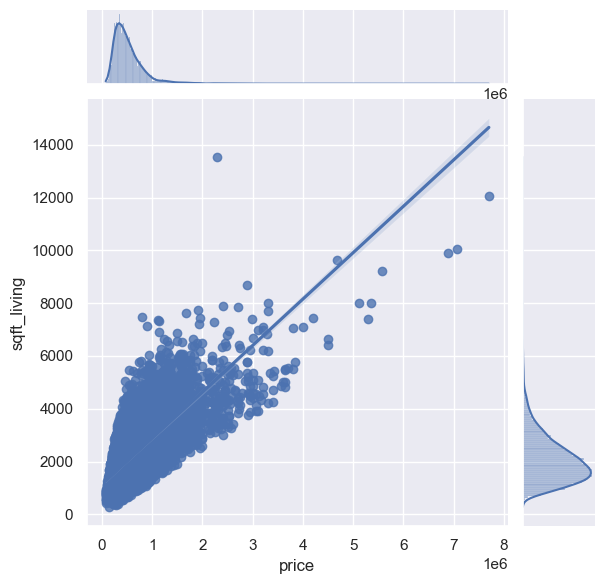

In [39]:
sns.jointplot(x=df['price'], y=df['sqft_living'], kind='reg');

#### Вывод:
 зависимость стоимости дома от размера жилой площади: скученность точек (жилых домов) вокруг прямой подтверждает гипотезу о зависимости исследуемых признаков.

#### 3.2 Анализ взаимных распределений стоимости домов и качества конструкции и дизайна

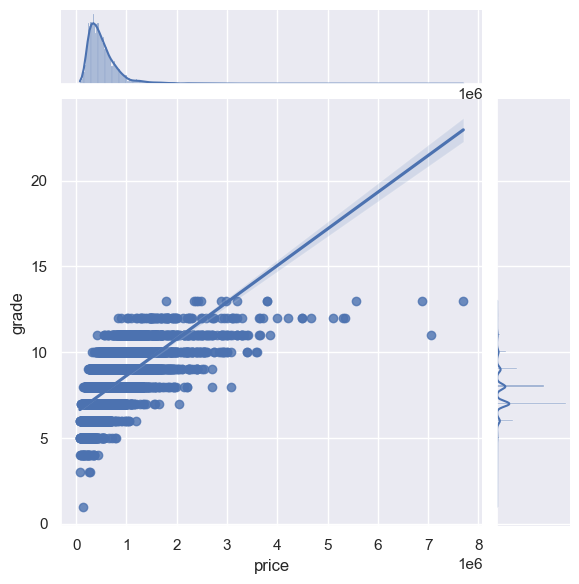

In [44]:
sns.jointplot(x=df['price'], y=df['grade'], kind='reg');

#### Вывод:
зависимость стоимости домов от качества конструкции и дизайна: скученность точек (жилых домов) прямыми линиями 3 до 12 подтверждает гипотезу о зависимости ислледуемых признаков. Рейтинг качества конструкции и дизаайна 1 и 2 на стоимость домов не влияет.

#### 3.3 Анализ взаимных распределений стоимости домов и количества кв. метров дома, которые находятся выше земли

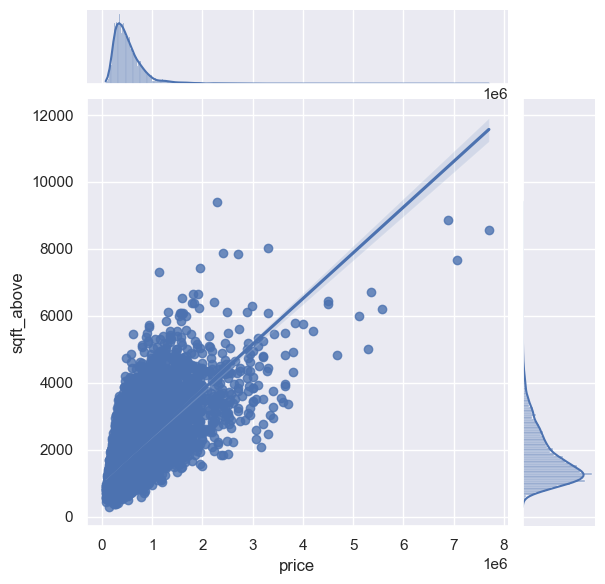

In [48]:
sns.jointplot(x=df['price'], y=df['sqft_above'], kind='reg');

#### Вывод:
зависимость стоимости домов от количества кв. метров дома, которые находятся выше земли: скученность точек (жилых домов) вокруг прямой подтверждает гипотезу о заметной зависимости ислледуемых признаков.

#### 3.4 Анализ взаимных распределений стоимости домов и кв. метры жилой площади у 15 соседей

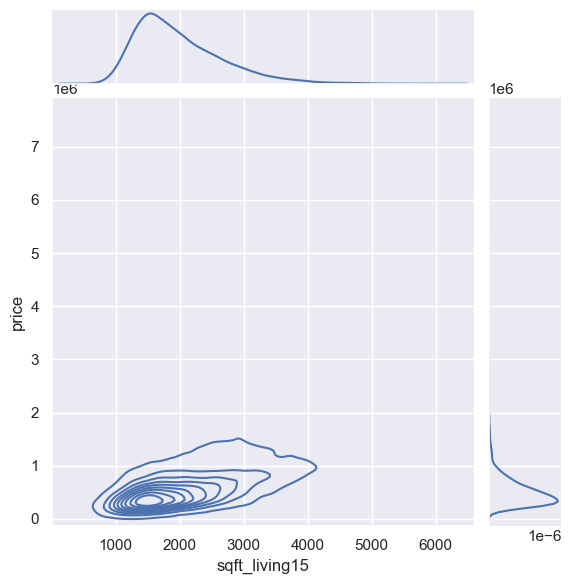

In [49]:
sns.jointplot(x=df['sqft_living15'], y=df['price'], kind='kde');

#### Вывод:
зависимость стоимости домов от кв. метры жилой площади у 15 соседей: график представлен растянутыми плотно расположенными друг к другу эллипсами, что подтверждает заметную связь между признаками -> чем больше скученность домов, тем выше цена 

#### 3.5 Анализ взаимных распределений стоимости дома и количества ванных комнат

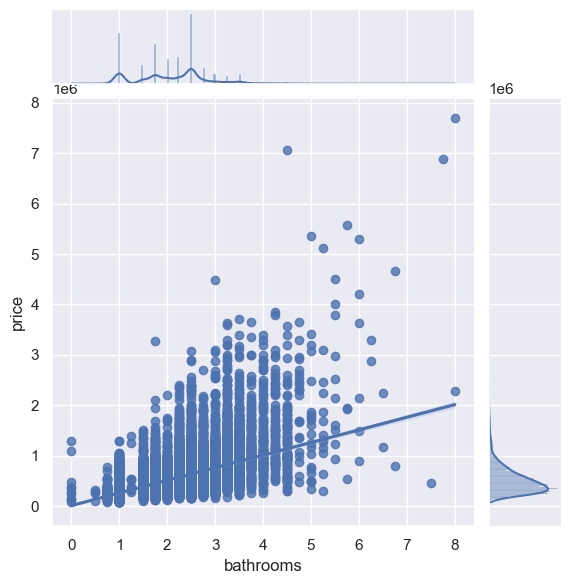

In [51]:
sns.jointplot(x=df['bathrooms'], y=df['price'], kind='reg');

Вывод:
зависимость стоимости дома от количества ванных комнат: на графике явно видны столбики, расположенные по возрастанию, что подтверждает гипотезу о заметной связи между исследуемыми признаками -> чем больше ванных комнат, тем выше цена дома.